<a href="https://colab.research.google.com/github/ajaymathew522/TheSparksFoundationInternship/blob/master/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing required Libraries.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np


Reading data.

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Splitting dataframe so that X is the independent varible and y is the dependent variable.

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1:].values 

Plotting the data. On examining the graph we can clearly see a linear relationship between the number of hours studied and marks obtained.

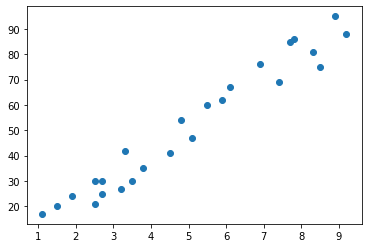

In [ ]:
plt.scatter(X,y)
plt.show()

Splitting the data into train and test sets.

In [ ]:
X_train, X_test, y_train , y_test =  train_test_split(X, y, test_size=.2, random_state=0)

Declaring a dictionary to be used in gridsearchcv.

In [ ]:
p_grid = {'fit_intercept':[True, False],'normalize':[True, False],'copy_X':[True, False]}

Creating a gridsearchcv model with linear regression as its estimator.

In [ ]:
model = GridSearchCV(LinearRegression(), param_grid=p_grid, refit=True, cv=5)


Fitting the model to the train data.

In [ ]:
model.fit(X_train, y_train)
model.best_estimator_.coef_

array([[10.22505649]])

Predicting using the test data.

In [ ]:
y_pred = model.predict(X_test)

importing mean_squared_error to be used in evalutaing the model.

In [ ]:
from sklearn.metrics import mean_squared_error

Finding the root mean squared error of our model.

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.926919438221814

Predicting the mark of the student when he/she studied for 9.5 hours.

In [ ]:
model.predict(np.array(9.5).reshape(-1,1))

array([[97.13803663]])

Plotting the data with the linear regressor we created.

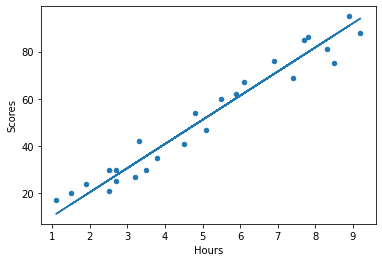

In [ ]:
data.plot(kind='scatter', x='Hours', y='Scores')
plt.plot(X, X*model.best_estimator_.coef_ + model.best_estimator_.intercept_  )
plt.show()